#### LIME Explainer ####

The LIME image explainer in Python is a method used to understand the predictions of image classifiers by highlighting the parts of the image that are most important for the prediction.


Here's what it does:

    Perturbs the image:
    It generates multiple variations of the original image by randomly hiding different parts of it.
    
    Predicts on variations:
    It passes each perturbed image through the image classifier and observes the resulting predictions.
    
    Builds a local model:
    Using the perturbed images and their corresponding predictions, it creates a simpler, 
    interpretable model (e.g., linear model) that approximates the behavior of the complex classifier in the vicinity of the original image.
    
    Extracts important features:
    From the local model, it identifies the features (superpixels in the case of images) that have the most significant impact on the prediction.
    
    Visualizes the explanation:
    It highlights the important features on the original image, providing a visual representation of what the classifier is focusing on.

In [ ]:
# pip install lime

c:\Users\raoji\uv-envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\raoji\uv-envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\raoji\uv-envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 1000/1000 [00:14<00:00, 69.49it/s]


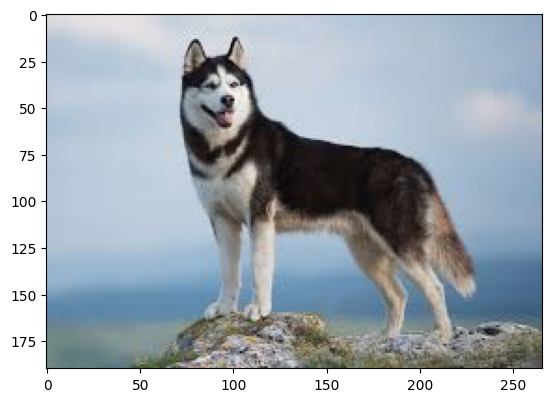

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
from lime import lime_image
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained model (ResNet18)
model = models.resnet18(pretrained=True)
model.eval()

# Preprocessing the image
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img = Image.open(image_path).convert('RGB')
    img_tensor = preprocess(img).unsqueeze(0)
    return img_tensor, img

img_tensor, img = preprocess_image("husky.jpg")

# LIME explainer for images
explainer = lime_image.LimeImageExplainer()

# Modify the predict function to ensure proper data type and normalization
def predict(input):
    input = torch.tensor(input).permute(0, 3, 1, 2).float()  # Convert to float and rearrange dimensions
    input = input / 255.0  # Normalize to [0, 1] range as expected by the model
    output = model(input).detach().numpy()
    return output

# Get the explanation for the top prediction
explanation = explainer.explain_instance(np.array(img), predict, top_labels=1, hide_color=0, num_samples=1000)

# Show the explanation with superpixels
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(temp)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..239.0].


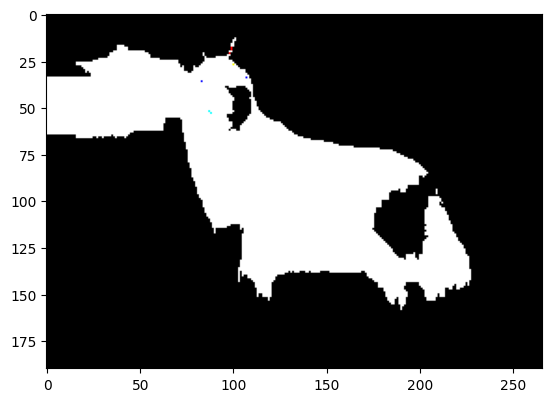

In [2]:
# Show only the positive superpixels that contribute to the model's decision
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True,  # Only show positive contributions
                                            num_features=5,  # Number of superpixels to show
                                            hide_rest=True)  # Hide the rest of the image

plt.imshow(temp)
plt.show()
